# Rozkłady prawdopodobieństwa

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt

## Rozkłady dyskretne

### Rozkład równomierny
Rzut kostką (wartości 1 - 6)

In [38]:
data = sps.randint.rvs(1, 7, size=100_000)  # (r)andom (v)ariate (s)eries
mean, var, skew, kurt = sps.randint.stats(1,  7, moments = 'mvsk')

In [39]:
mean, var, skew, kurt # Wartości teoretyczne (dla "nieskończonej" ilości danych)

(3.5, 2.9166666666666665, 0.0, -1.2685714285714285)

In [41]:
np.mean(data), np.var(data), sps.skew(data), sps.kurtosis(data) # Wartości obserwowane (dla "skończonej" ilości danych)

(3.49413, 2.9163655431000004, 0.0060898701602817755, -1.2688531700555148)

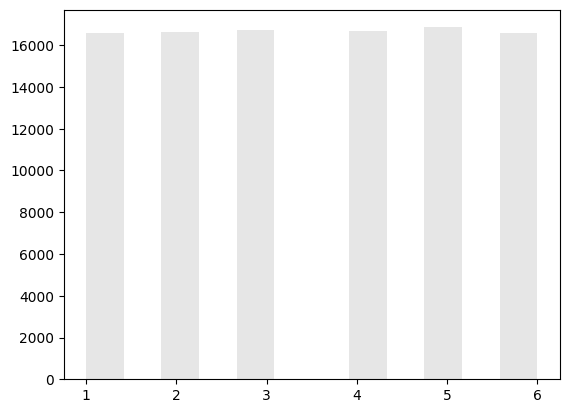

In [26]:
plt.hist(data, bins=12, color=[(0.9,0.9,0.9)]);

In [50]:
cube1 = sps.randint.rvs(1, 7, size=100_000)  # (r)andom (v)ariate (s)eries
cube2 = sps.randint.rvs(1, 7, size=100_000)  # (r)andom (v)ariate (s)eries
cube3 = sps.randint.rvs(1, 7, size=100_000)  # (r)andom (v)ariate (s)eries

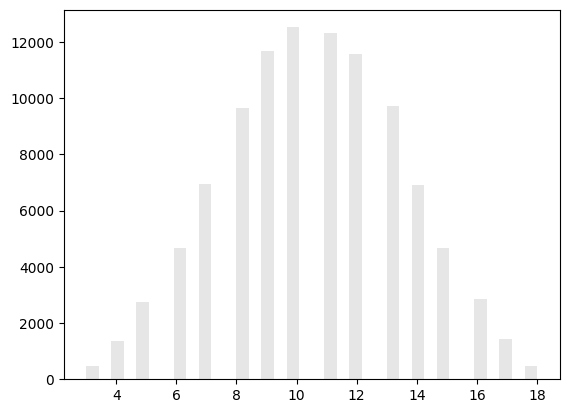

In [52]:
plt.hist(cube1+cube2+cube3, bins=36, color=[(0.9,0.9,0.9)]);

### Rozkład Bernoulliego

In [57]:
p = 1/6
data = sps.bernoulli.rvs(p, size=100_000) # (r)andom (v)ariate(s)
mean, var, skew, kurt = sps.bernoulli.stats(p, moments = 'mvsk')

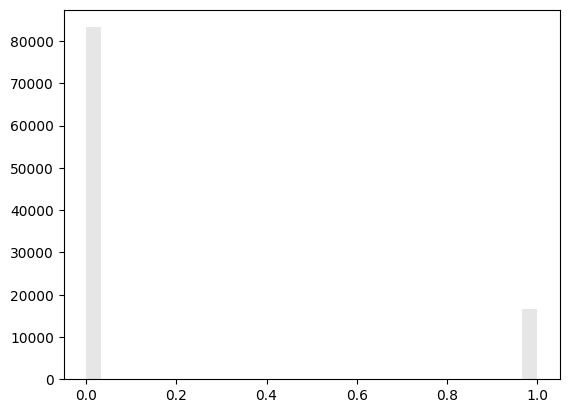

In [61]:
plt.hist(data, bins=30, color=[(0.9,0.9,0.9)]);

### Rozkład dwumianowy

In [62]:
%%latex
$$P(X = k) = P(k,n,p) = \binom{n}{k}p^k\cdot(1-p)^{n-k}  $$

<IPython.core.display.Latex object>

In [104]:
%%latex
$$\binom{n}{k} = \frac{n!}{(n-k)! \cdot k!} $$

<IPython.core.display.Latex object>

In [98]:
from math import factorial
from itertools import product

In [83]:
# card_figure = ['A', 'K', 'D', 'W']
# list(product(card_figure, card_figure))

In [103]:
n = 5
k = 2

newton_symbol = factorial(n) / (factorial(n-k)*factorial(k))
newton_symbol

10.0

In [88]:
k, n, p = 5, 10, 0.3
prob = sps.binom.pmf(k, n, p) # (p)robability (m)ass (f)unction

#### Przykład nr 1
Koszykarz oddaje $n=4$ rzutów do kosza. Piłka wpada do kosza z $p=0.8$. Znajdź rozkład zmiennej losowej przyjmującej wartości celnych rzutów do kosza. Oblicz wartość oczekiwaną ilości trafień.

Wartość oczekiwana: 3.20


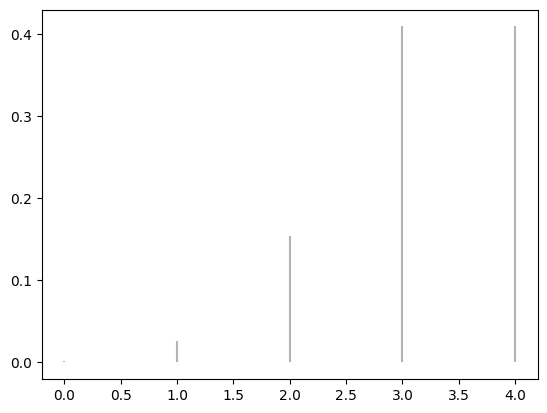

In [73]:
n = 4 # rzuty do kosza
p = 0.8
prob = np.array([sps.binom.pmf(k, n, p) for k in np.arange(n+1)])

# Wartość oczekiwana
print(f"Wartość oczekiwana: {np.sum(prob*np.arange(n+1)):.2f}")

fig, ax = plt.subplots(1, 1)
ax.vlines(range(n+1), 0, prob, color=[(0.7,0.7,0.7)]);

#### Zadanie nr 1
Zasymulować (z użyciem `sps.bernoulli.rvs`) 100_000 prób 4-krotnego rzutu do kosza i sprawdzić rozkład wyników z symulacji.

### Rozkład Poissona
*Rozkład zdarzeń rzadkich*

In [105]:
%%latex
$$P(X = k) = P(k,\lambda) = \frac{\lambda^k}{k!}\cdot e^{-\lambda}  $$

<IPython.core.display.Latex object>

#### Przykład nr 2
W pewnej firmie produkcyjnej taśma z powodu awarii jest zatrzymywana średnio 2 razy na kwartał. Jeżeli liczba awarii ma rozkład Poissona jakie jest prawdopodobieństwo wystąpienia 1,2,3,4,5,... awarii w ciągu kwartału.

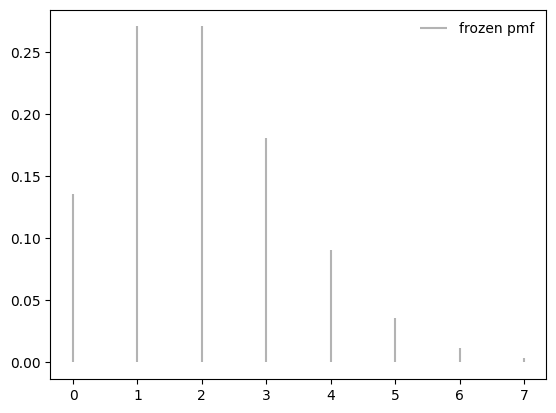

In [125]:
mu = 2
x = np.arange(sps.poisson.ppf(0.01, mu), sps.poisson.ppf(0.999, mu))
rv = sps.poisson(mu)
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, rv.pmf(x), color=[(0.7,0.7,0.7)], label='frozen pmf')
ax.legend(frameon=False)
plt.show()

## Rozkłady ciągłe

### Rozkład normalny

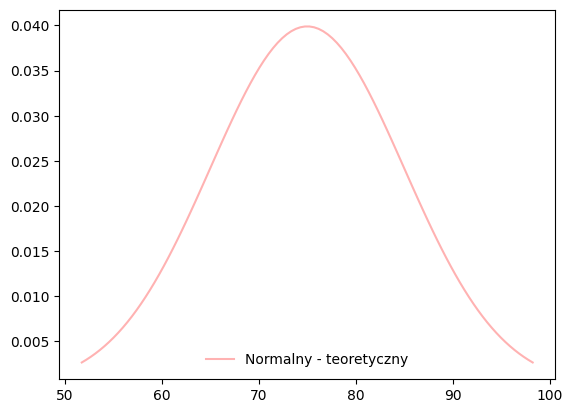

In [147]:
loc=75
scale=10

fig, ax = plt.subplots(1, 1)
data = np.linspace(sps.norm.ppf(0.01, loc=loc, scale=scale), sps.norm.ppf(0.99, loc=loc, scale=scale), 100)
ax.plot(data, sps.norm.pdf(data, loc=loc, scale=scale), 'r-', alpha=0.3, label='Normalny - teoretyczny') #(p)robability (d)ensity (f)unction
ax.legend(frameon=False)
plt.show()

In [166]:
sps.norm.stats(loc=loc, scale=scale, moments='mvsk')

(75.0, 100.0, 0.0, 0.0)

In [167]:
np.mean(data), np.var(data), sps.skew(data), sps.kurtosis(data)

(75.00263675318875,
 100.07725793453766,
 -0.0021786224918159723,
 0.005203307770120347)

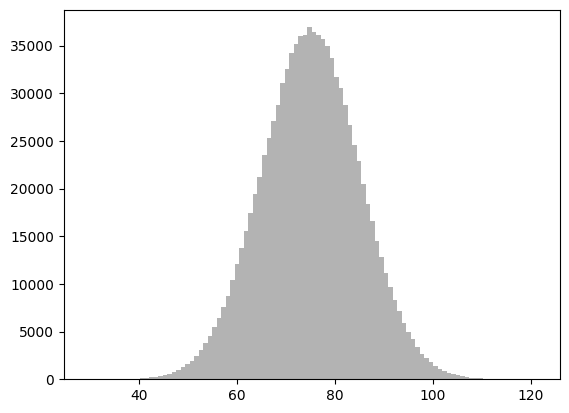

In [163]:
fig, ax = plt.subplots(1, 1);
data = sps.norm.rvs(loc=loc, scale=scale, size=1_000_000)
ax.hist(data, bins=100, color=[(0.7,0.7,0.7)])
plt.show()

#### Centralne Twierdzenie Graniczne
Dla danego ciągu niezależnych zmiennych losowych $X_1, X_2, X_3, ..., X_n $ z dowolnego rozkładu o tej samej wartości oczekiwanej i wariancji średnie wartości sumy tego ciągu zbiegają (po normalizacji) do standardowego rozkładu normalnego.

In [172]:
### Metoda bootstrap

In [168]:
data = pd.read_csv("../data/napoje.csv", sep=';')

In [169]:
def CTG_example(data_array, sample_size, n_iter=[10, 100, 1000, 5000]):
    
    fig, axes = plt.subplots(len(n_iter) // 2, 2, figsize=(8, 8))
    for idx, n in enumerate(n_iter):
        means = [data_array.sample(sample_size).mean() for _ in range(n)]
        axes[idx // 2, idx % 2].hist(means, bins=20, color=[(0.9,0.9,0.9)])
        axes[idx // 2, idx % 2].set_title(f'Sample size={sample_size}; iterations={n}')
    
    plt.tight_layout()
    plt.show()

In [170]:
data_array=data['fanta']

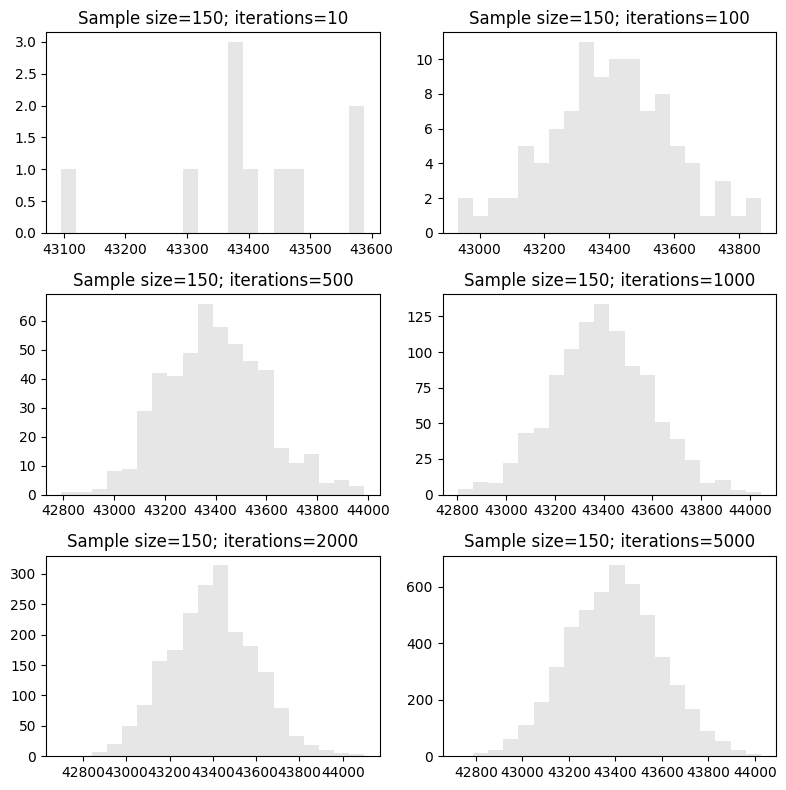

In [171]:
CTG_example(data_array, sample_size=150,  n_iter=[10, 100, 500, 1000, 2000, 5000])

#### Reguła 3 sigm

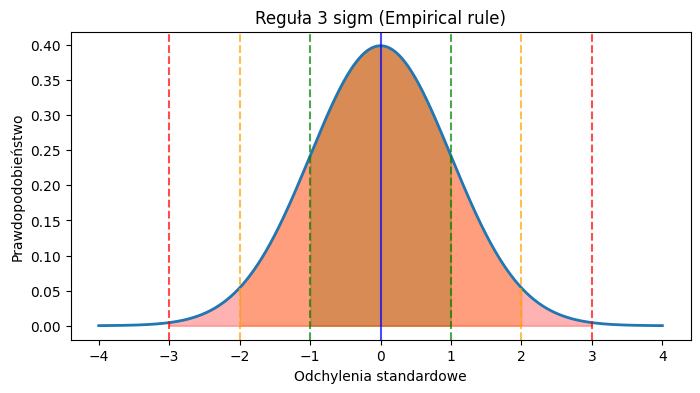

In [174]:
# Dane
x = np.linspace(-4, 4, 1000)
y = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)

# Wykres
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, linewidth=2)

# Obszary pod wykresem
ax.fill_between(x, y, where=np.logical_and(x >= -1, x <= 1), color='green', alpha=0.3)
ax.fill_between(x, y, where=np.logical_and(x >= -2, x <= 2), color='orange', alpha=0.3)
ax.fill_between(x, y, where=np.logical_and(x >= -3, x <= 3), color='red', alpha=0.3)

# Średnia
ax.axvline(x=0, linestyle='-', color='blue', alpha=0.7)

# Linie odchylenia standardowego
ax.axvline(x=-1, linestyle='--', color='green', alpha=0.7)
ax.axvline(x=1, linestyle='--', color='green', alpha=0.7)
ax.axvline(x=-2, linestyle='--', color='orange', alpha=0.7)
ax.axvline(x=2, linestyle='--', color='orange', alpha=0.7)
ax.axvline(x=-3, linestyle='--', color='red', alpha=0.7)
ax.axvline(x=3, linestyle='--', color='red', alpha=0.7)

# Tytuł i oznaczenia osi
ax.set_title('Reguła 3 sigm (Empirical rule)')
ax.set_xlabel('Odchylenia standardowe')
ax.set_ylabel('Prawdopodobieństwo')

plt.show()


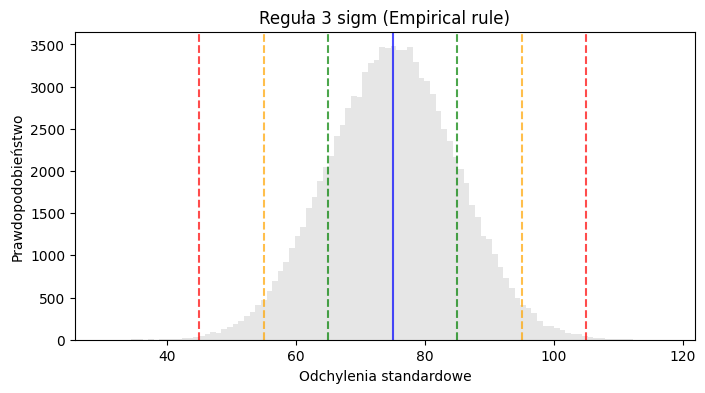

In [177]:
# Dane
mu, std = 75, 10

y = sps.norm.rvs(mu, std, 100000)

# Wykres
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(y, bins=100, color=[(0.9,0.9,0.9)])

# Średnia
ax.axvline(x=mu, linestyle='-', color='blue', alpha=0.7)

# Linie odchylenia standardowego
ax.axvline(x=mu - std, linestyle='--', color='green', alpha=0.7)
ax.axvline(x=mu + std, linestyle='--', color='green', alpha=0.7)
ax.axvline(x=mu - 2*std, linestyle='--', color='orange', alpha=0.7)
ax.axvline(x=mu + 2*std, linestyle='--', color='orange', alpha=0.7)
ax.axvline(x=mu - 3*std, linestyle='--', color='red', alpha=0.7)
ax.axvline(x=mu + 3*std, linestyle='--', color='red', alpha=0.7)

# Tytuł i oznaczenia osi
ax.set_title('Reguła 3 sigm (Empirical rule)')
ax.set_xlabel('Odchylenia standardowe')
ax.set_ylabel('Prawdopodobieństwo')

plt.show()


In [183]:
len(y[(y >=  mu - std) & (y <=  mu + std)]) / len(y)

0.67999

In [184]:
len(y[(y >=  mu - 2*std) & (y <=  mu + 2*std)]) / len(y)

0.9551

In [185]:
len(y[(y >=  mu - 3*std) & (y <=  mu + 3*std)]) / len(y)

0.99738